<a href="https://colab.research.google.com/github/armankaishar/Diabetes_Risk_Factors_Analysis_BRFSS_2015/blob/main/Diabetes_BRFSS2015_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing Libreries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#1. Loading and verifying the Data Set

In [ ]:
dbds = pd.read_csv('/content/diabetes_BRFSS2015 - diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
dbds.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
5,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7
6,0,0,1,1,26,1,0,0,1,1,...,1,0,1,0,0,0,1,13,5,6
7,0,0,0,1,31,1,0,0,0,1,...,1,0,4,0,0,0,1,6,4,3
8,0,0,0,1,32,0,0,0,1,1,...,1,0,3,0,0,0,0,3,6,8
9,0,0,0,1,27,1,0,0,0,1,...,1,0,3,0,6,0,1,6,4,4


In [ ]:
dbds.shape

(70692, 22)

In [ ]:
dbds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [ ]:
dbds.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
dbds.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


**Variables Overview:**

*   **Diabetes_binary**: 0 for no diabetes, 1 for prediabetes or diabetes.
*   **Health-related variables**: High blood pressure, cholesterol levels, BMI, smoking status, history of stroke, heart disease, etc.
*   **Lifestyle-related variables**: Physical activity, fruit and vegetable consumption, alcohol consumption, etc.
*   **Demographic variables**: Age, sex, education, income, etc.

#2. Target Variable Distribution

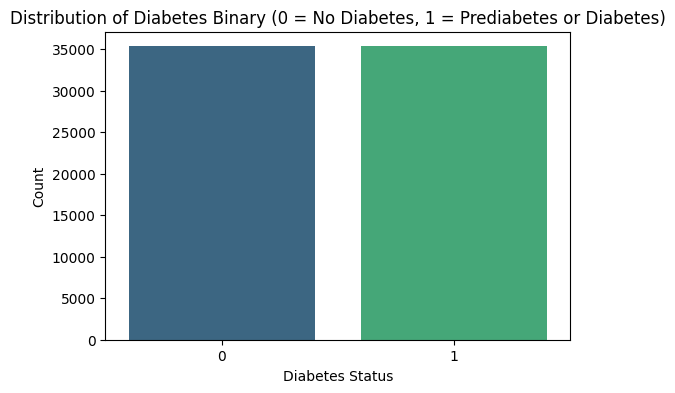

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=dbds, x='Diabetes_binary', hue='Diabetes_binary', palette='viridis', legend=False)
plt.title('Distribution of Diabetes Binary (0 = No Diabetes, 1 = Prediabetes or Diabetes)')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

The plot shows that the dataset is balanced with an equal distribution of respondents having diabetes or prediabetes (class 1) and those without diabetes (class 0).

# 3. Univariate Analysis

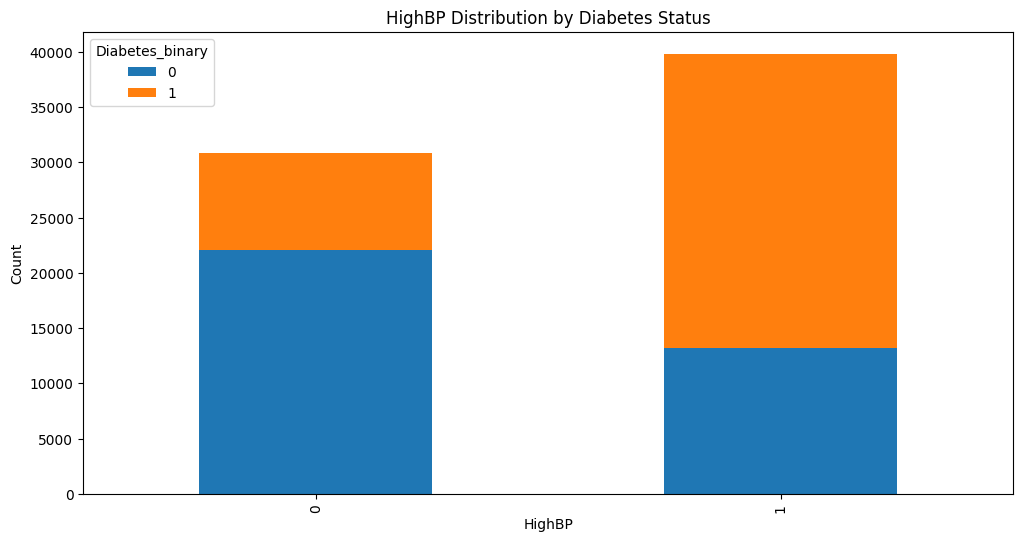

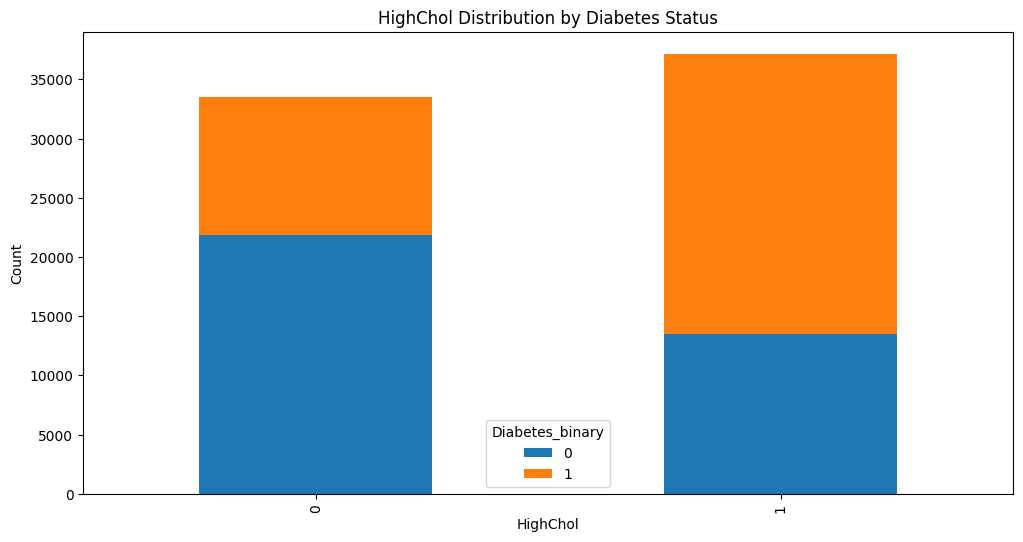

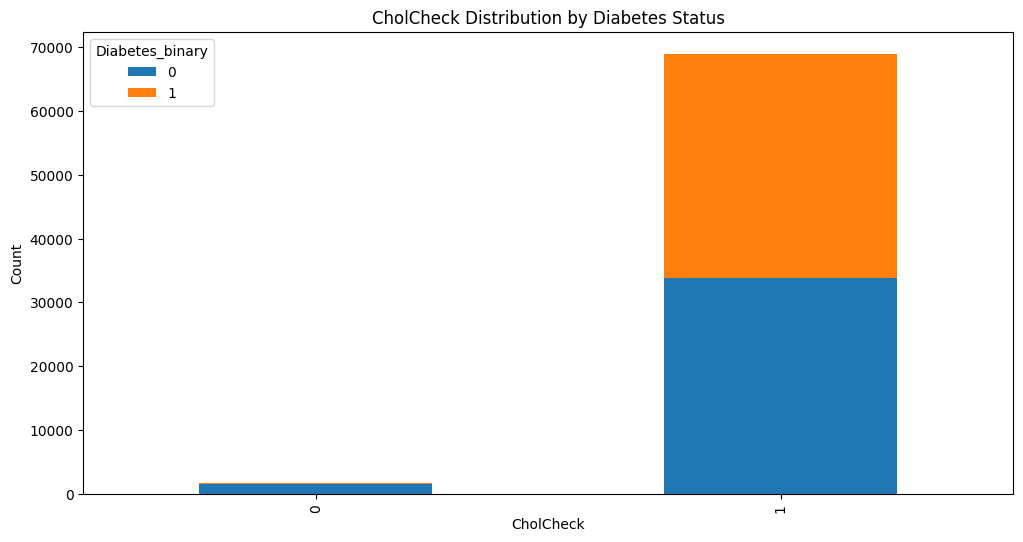

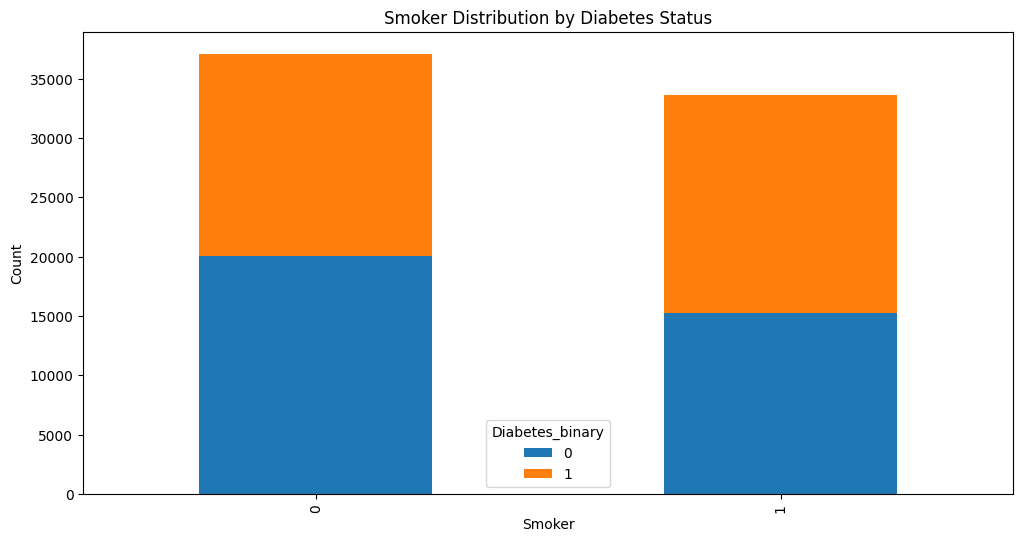

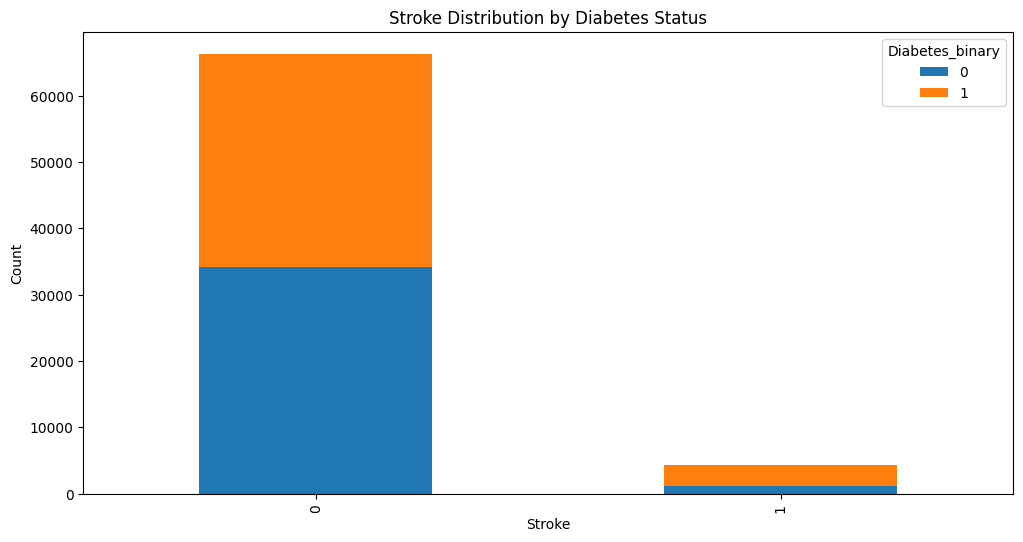

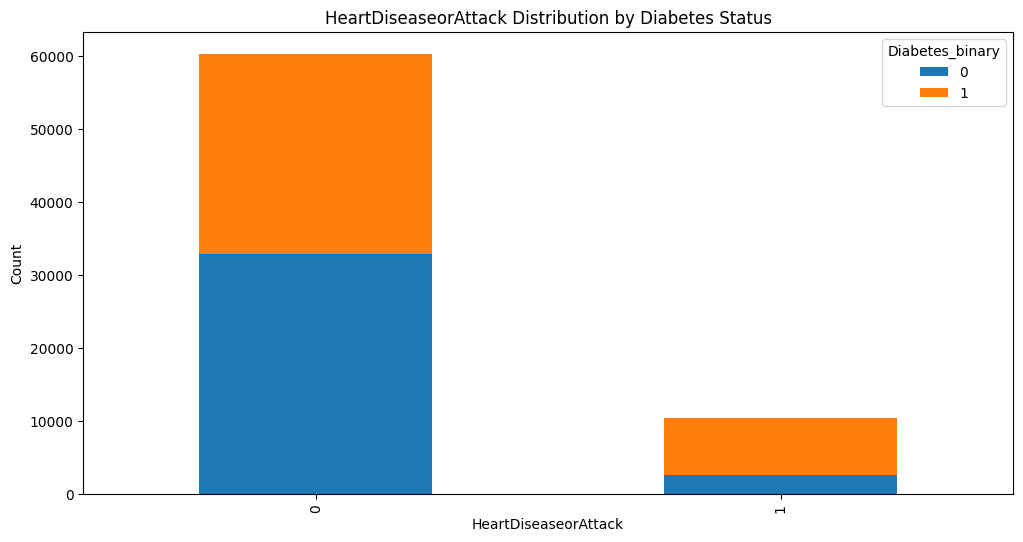

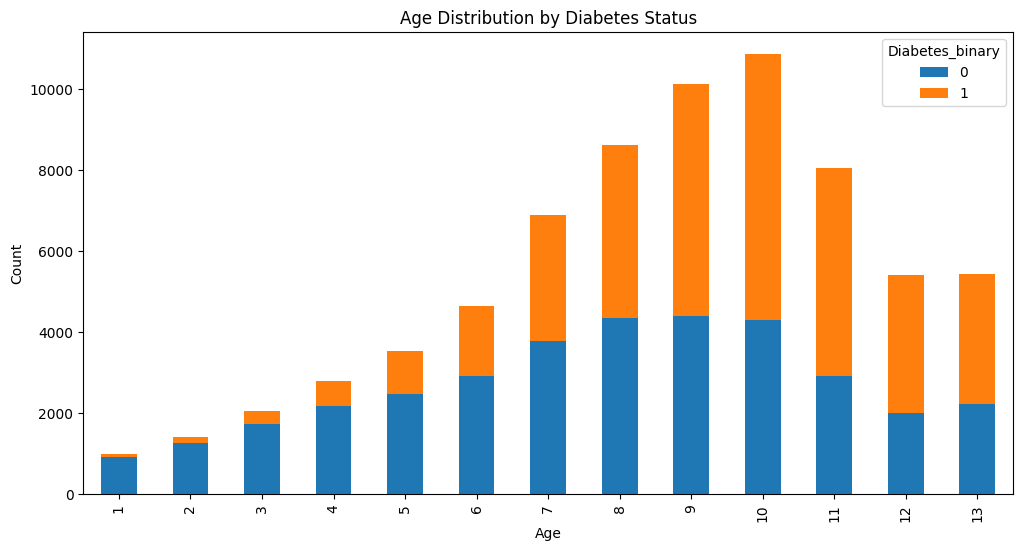

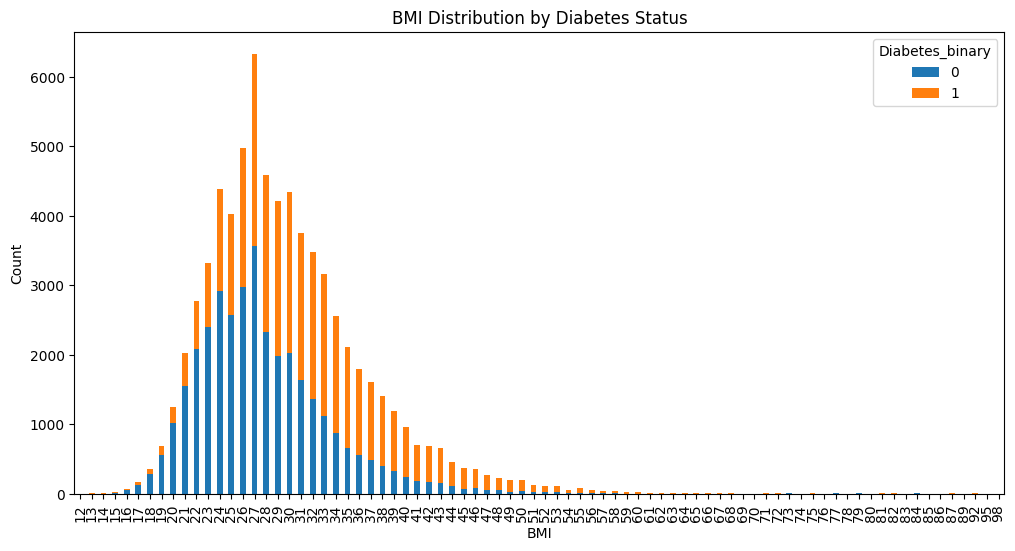

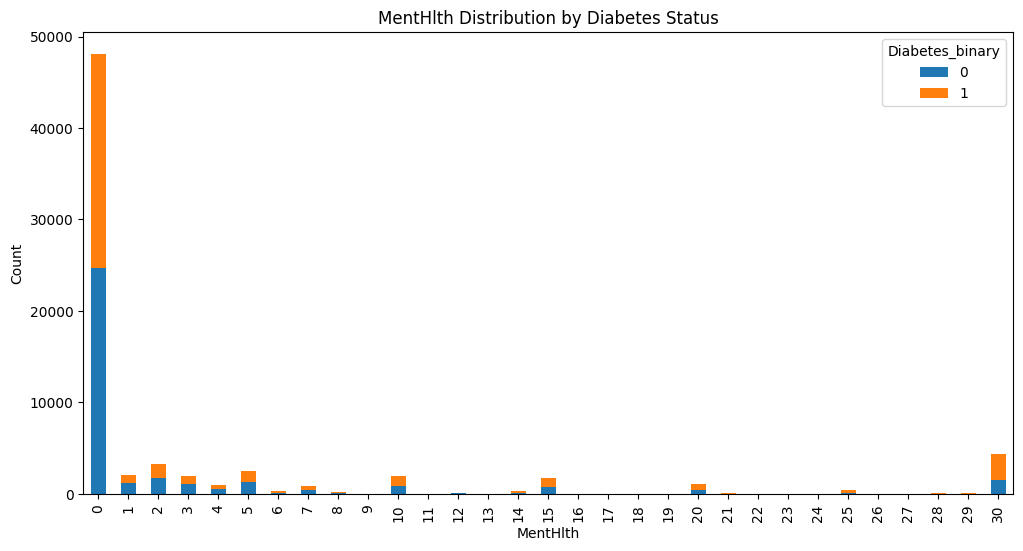

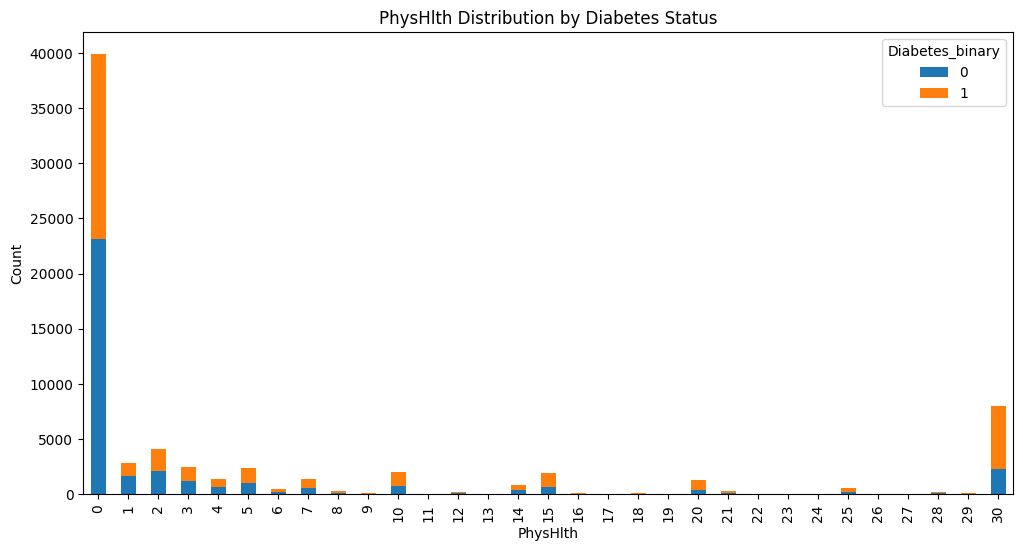

In [ ]:
# Define a list of key variables to plot
key_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Age', 'BMI', 'MentHlth', 'PhysHlth']

# Plotting the countplots for categorical variables and histogram for BMI (continuous)
for column in key_vars:
    pd.crosstab(dbds[column], dbds['Diabetes_binary']).plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'{column} Distribution by Diabetes Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

**The univariate analysis of key health-related variables shows:**

1. High Blood Pressure (**HighBP**): The stacked bar chart shows a larger portion of individuals with diabetes having high blood pressure compared to those without diabetes. High blood pressure is a known risk factor for diabetes, and this chart visually confirms that individuals with diabetes are more likely to report high BP.
2. High Cholesterol (**HighChol**): A higher proportion of individuals with diabetes have high cholesterol. The larger segment of diabetic individuals with high cholesterol reflects the association between cholesterol issues and diabetes.
3. Cholesterol Check (**CholCheck**): The distribution of individuals who have had a cholesterol check should show a higher proportion of checks among the diabetic group. Regular health check-ups, especially cholesterol monitoring, are more common among those with diabetes due to the higher risk of complications.
4. Smoking (**Smoker**): A slight increase may seen in the proportion of smokers among diabetic individuals, but smoking is not as directly linked to diabetes as other factors. While smoking is a general health risk, its direct impact on diabetes risk is not as strong as factors like BMI or physical activity. However, we may still see a noticeable difference.
5. **Stroke**: Individuals with a stroke are more represented in the diabetic group. Diabetes increases the risk of stroke, so the chart shows a significant proportion of individuals with diabetes reporting past strokes.
6. **Heart Disease or Attack**: A larger proportion of individuals with diabetes have a history of heart disease or heart attacks. The chart shows a strong association between diabetes and cardiovascular issues, with more diabetic individuals reporting heart disease.
7. **Age**: Older age groups might have a higher proportion of individuals with diabetes. Age is one of the strongest risk factors for diabetes, so older individuals having a significantly higher prevalence of diabetes is found in this chart.
8. **BMI**: The Body Mass Index (**BMI**) distribution shows a wide range with a slight right skew, indicating some individuals with higher BMI. Higher BMI values are associated with a higher prevalence of diabetes. Obesity is a key risk factor for diabetes, and individuals with higher BMI are more likely to have diabetes. The bar plot reflects this strong relationship.
9. **MentHlth** (Mental Health): Poor mental health is associated with chronic conditions, including diabetes. We see a higher proportion of individuals with poor mental health reporting diabetes, as mental health issues can be both a cause and a consequence of chronic diseases.
10. **PhysHlth** (Physical Health): Poor physical health, like mental health, is expected to be more prevalent among diabetic individuals. Individuals who report poor physical health are more likely to have diabetes, as diabetes can lead to a range of physical health problems.

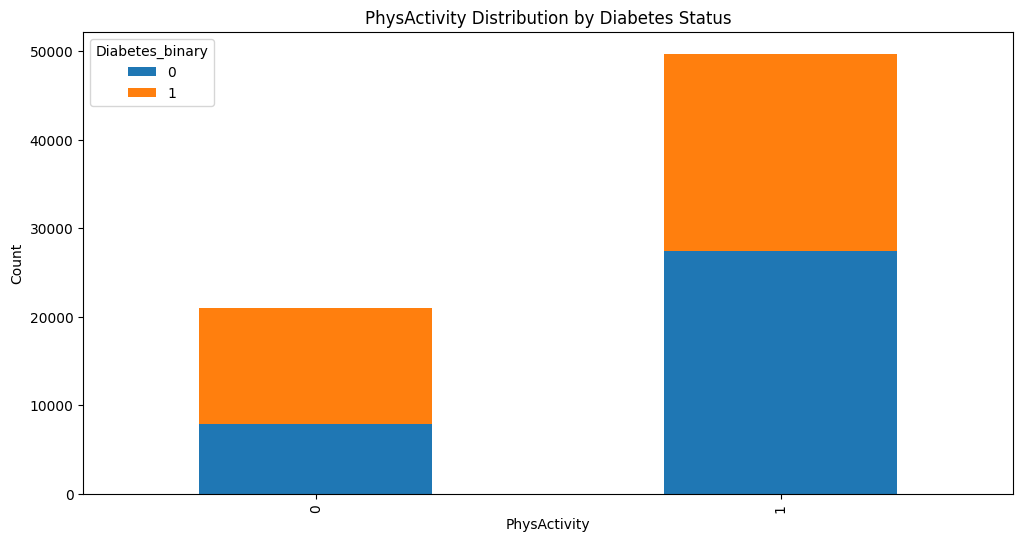

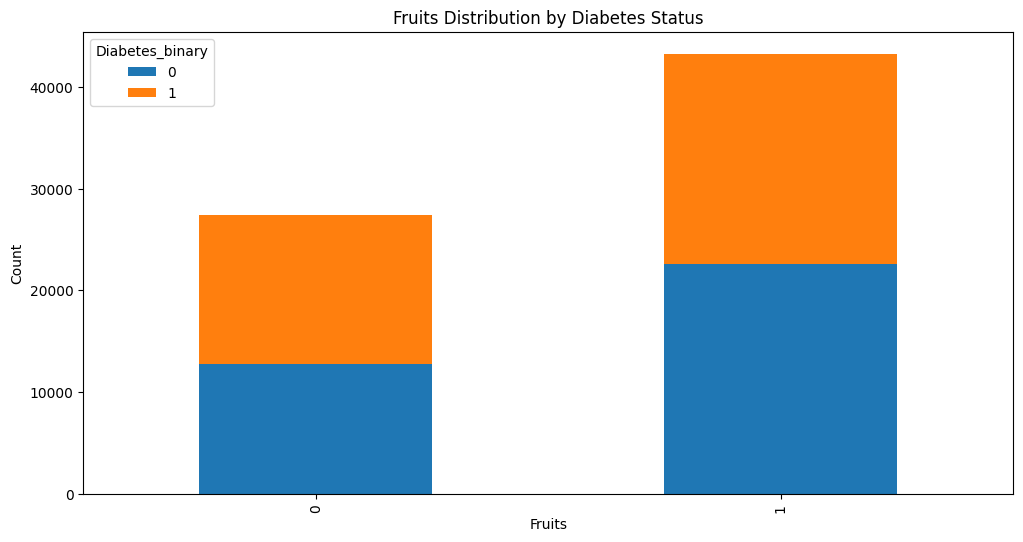

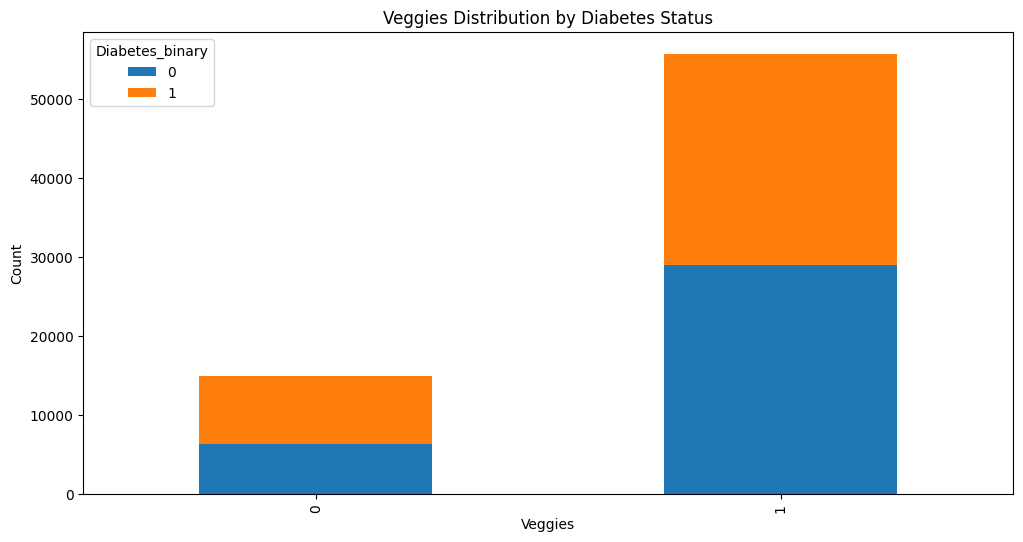

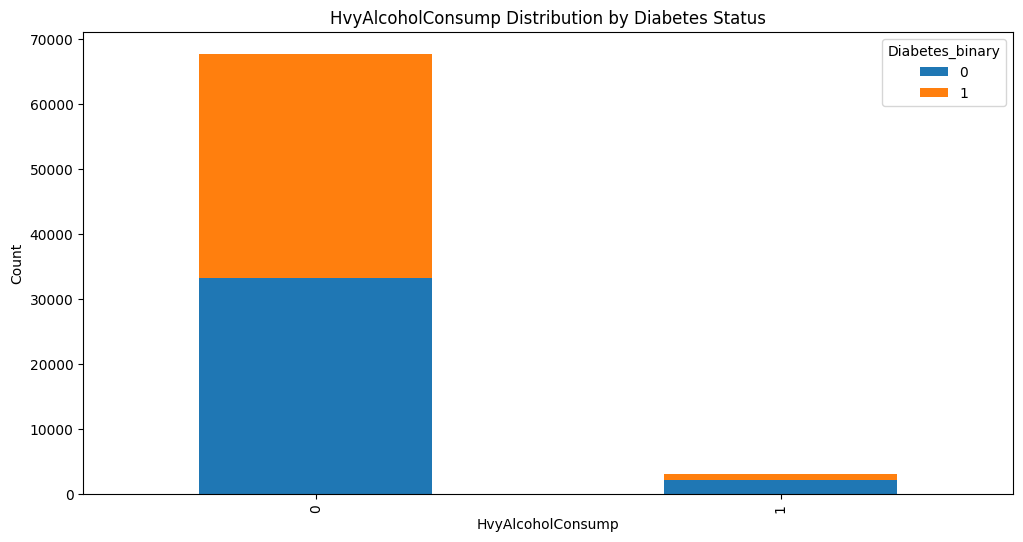

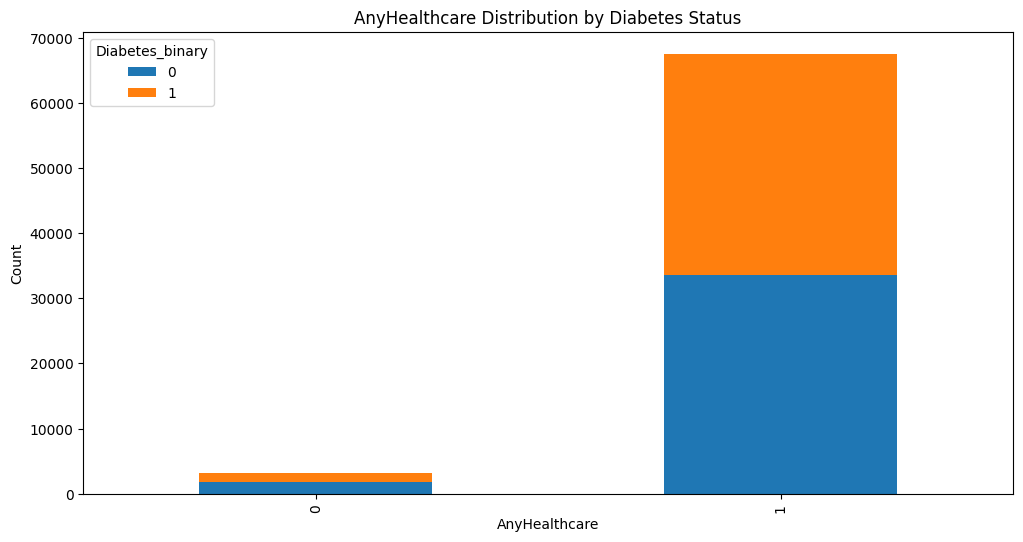

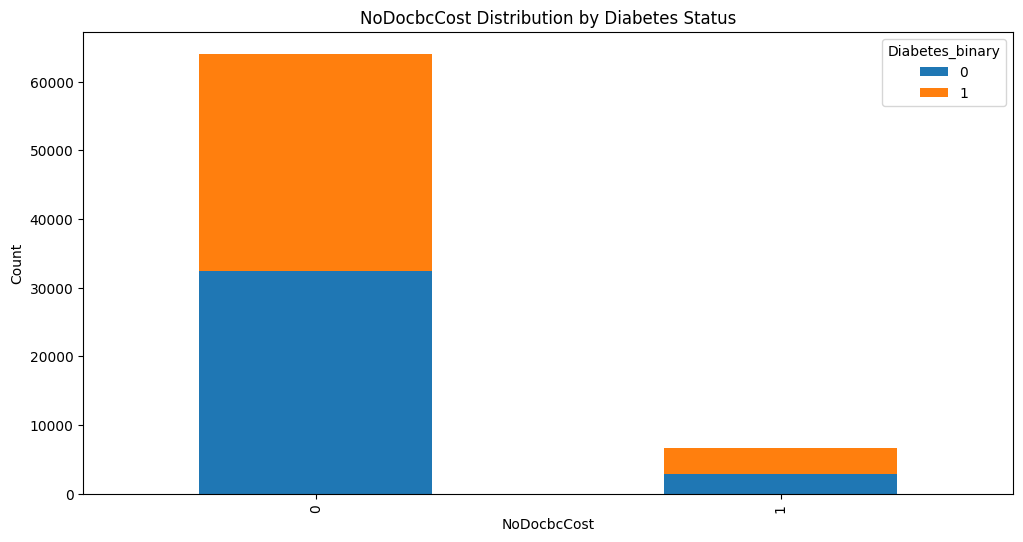

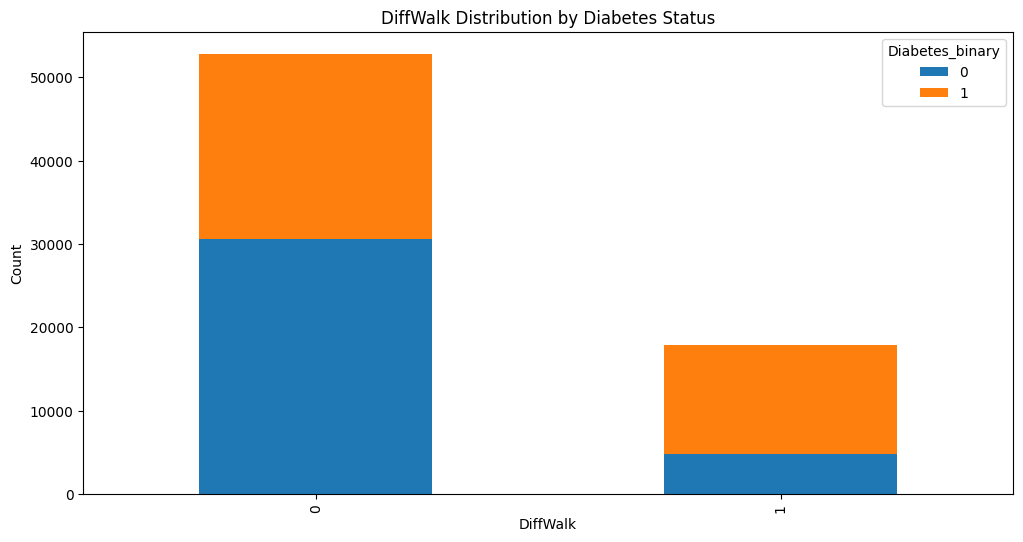

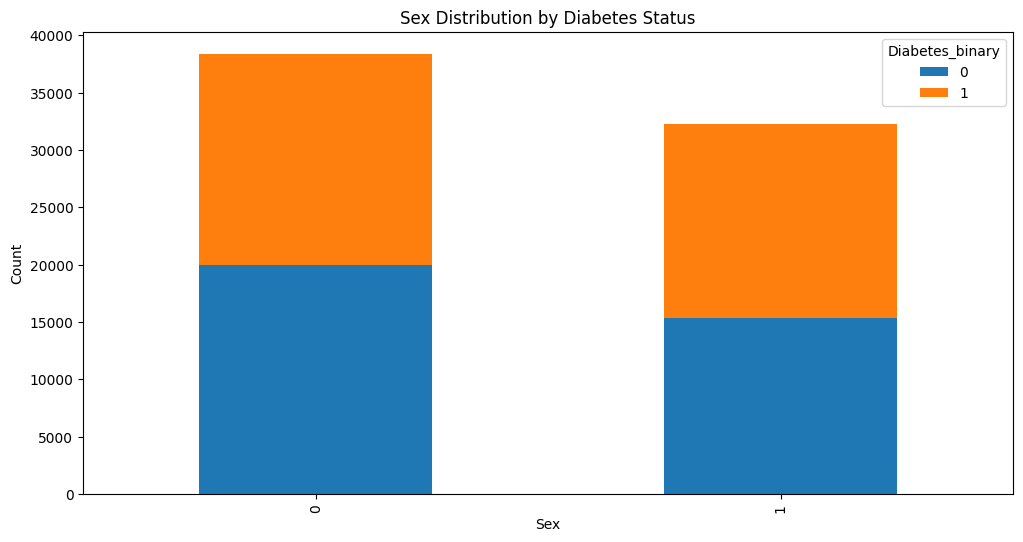

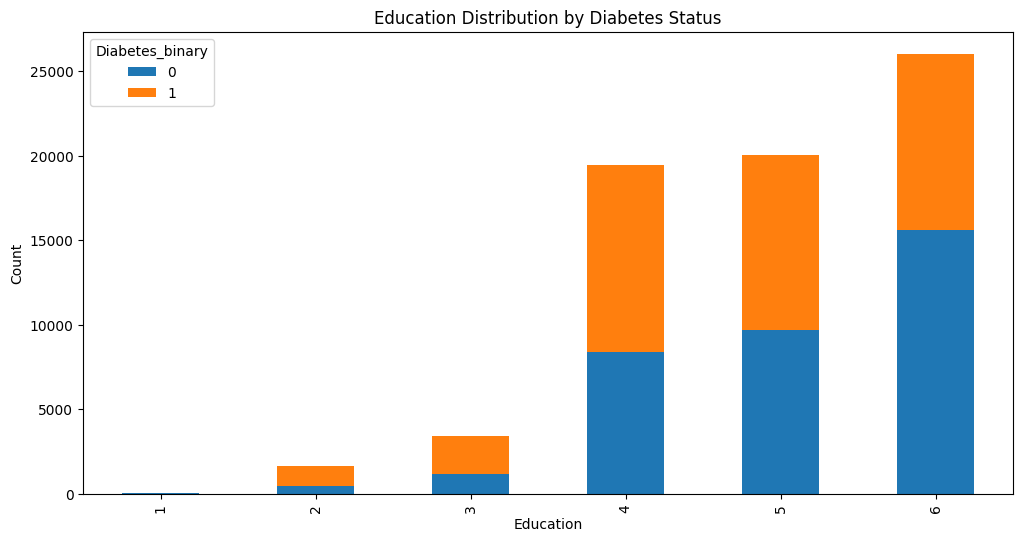

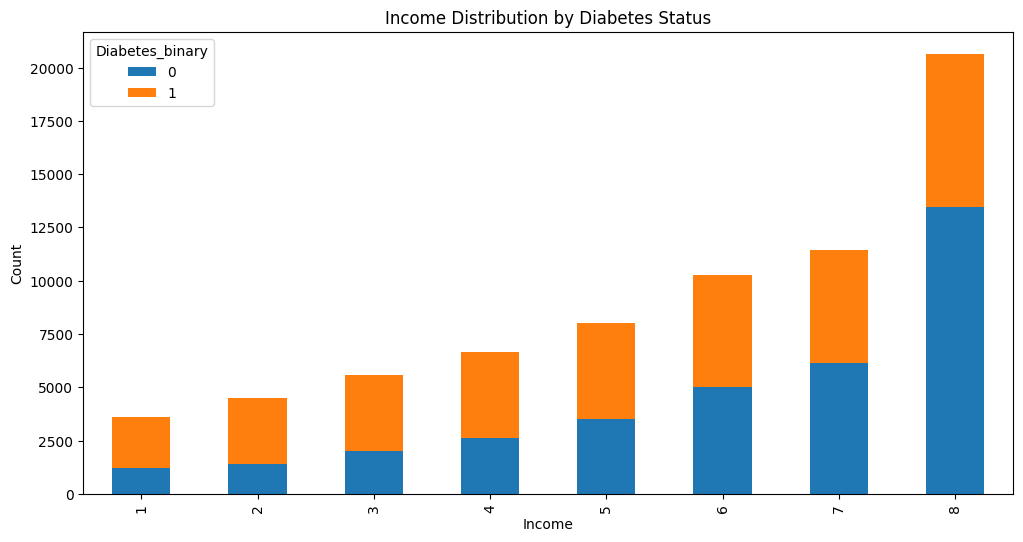

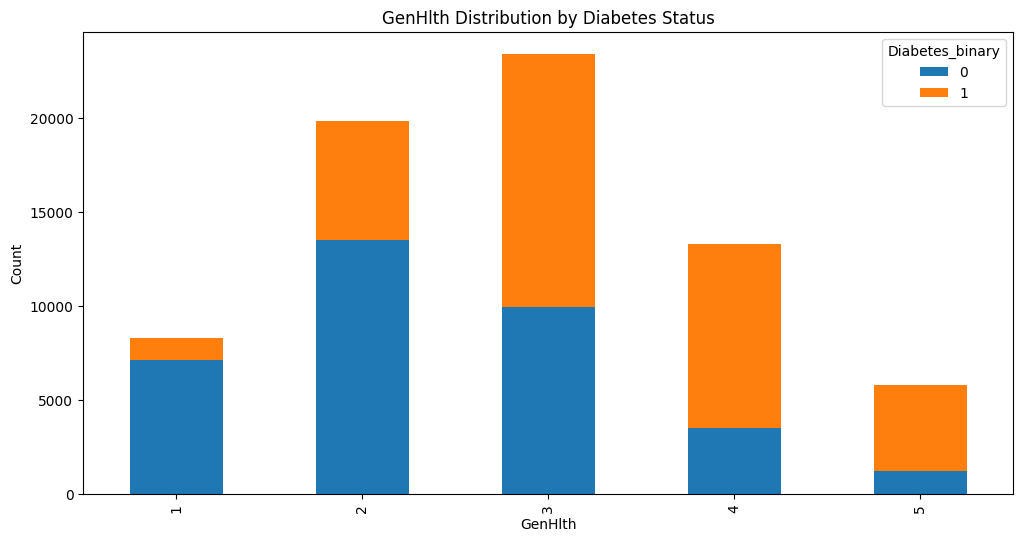

In [ ]:
# List of other categorical columns
categorical_columns = [
    'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex', 'Education', 'Income', 'GenHlth'
]

# Plotting using pandas directly
for column in categorical_columns:
    pd.crosstab(dbds[column], dbds['Diabetes_binary']).plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'{column} Distribution by Diabetes Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

**The univariate analysis of other health-related variables shows:**

* **PhysActivity** (Physical Activity): Physical activity is protective against diabetes, so a lower segment of physically active individuals in the diabetic group compared to the non-diabetic group.
* **Fruits and Veggies** (Consumption of Fruits/Veggies): Healthy dietary habits, such as consuming fruits and vegetables daily, are associated with a lower risk of diabetes. The chart shows a higher proportion of non-diabetic individuals reporting regular fruit and vegetable consumption.
* **HvyAlcoholConsump** (Heavy Alcohol Consumption): Heavy alcohol consumption is a risk factor for various health issues, including diabetes, but a significant difference between the two groups is not found. While excessive alcohol consumption is a general health risk, its direct impact on diabetes is not so strong.
* **AnyHealthcare** (Health Coverage): People with diabetes often require frequent health checkups and treatments, so having health coverage is crucial. This results in a higher proportion of diabetic individuals with health coverage.
* **NoDocbcCost** (Unable to See Doctor Due to Cost): Diabetes management often requires ongoing medical support. People with diabetes who can’t afford to see a doctor may face worse health outcomes, and this may be reflected in the chart.
* **DiffWalk** (Difficulty Walking): Diabetes can cause complications that affect mobility. A larger proportion of diabetic individuals may report serious difficulty walking, compared to non-diabetic individuals.
* **Sex** (Gender): Diabetes affects both genders, so relatively balanced distributions of men and women is seen in both diabetic and non-diabetic groups.
* **Education**: Lower education levels are often associated with higher diabetes risk due to socioeconomic factors. People with lower education levels may have higher rates of diabetes, reflecting the impact of socioeconomic status on health outcomes.
* **Income**: Lower income is often associated with limited access to healthy food, healthcare, and physical activity, which can increase the risk of diabetes.
* **GenHlth** (General Health): Diabetes often coexists with other health problems, so individuals with poor general health are more likely to have diabetes.

# 4. Correlation Heatmap

*   The correlation heatmap helps visualize how each feature in the dataset
correlates with other features, particularly the target variable Diabetes_binary. The correlation values range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.
*   A positive correlation means that as one feature increases, the other also tends to increase.
*   A negative correlation means that as one feature increases, the other tends to decrease.

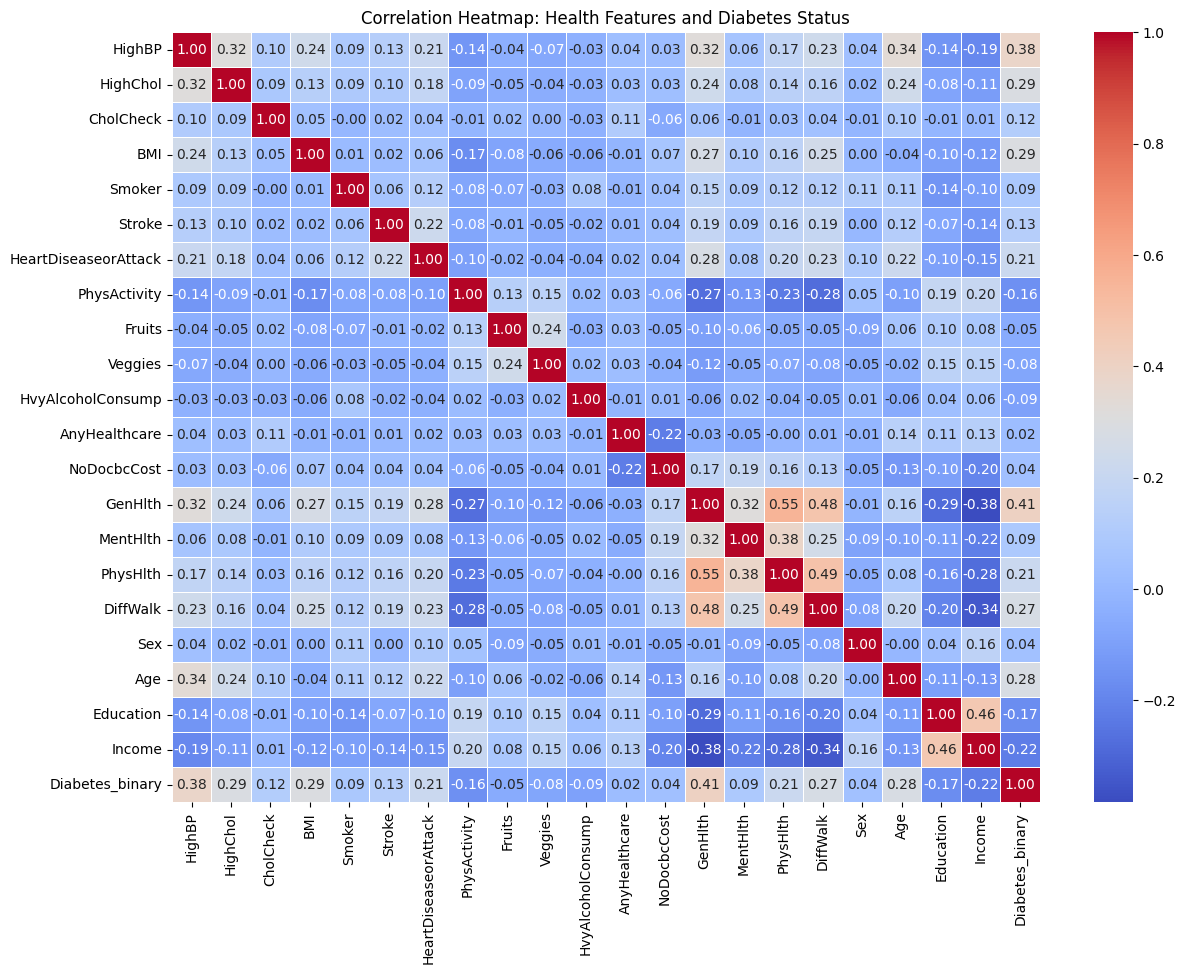

In [ ]:
# Correlation analysis between numerical features and the target variable (Diabetes_binary)

# Selecting relevant features for correlation analysis
health_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                   'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Calculate the correlation matrix
corr_matrix = dbds[health_features + ['Diabetes_binary']].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Health Features and Diabetes Status')
plt.show()

In [ ]:
# Compute correlation of all features with the target variable 'Diabetes_binary'
corr = dbds[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
             'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
             'Age', 'Education', 'Income', 'MentHlth', 'PhysHlth', 'GenHlth',
             'Diabetes_binary']].corr()['Diabetes_binary'].sort_values(ascending=False)

# Convert the correlation series to a DataFrame
corr = corr.to_frame()

# Apply a background gradient for better visualization
corr.style.background_gradient(cmap="RdYlBu")

,Diabetes_binary
Diabetes_binary,1.000000
GenHlth,0.407612
HighBP,0.381516
BMI,0.293373
HighChol,0.289213
Age,0.278738
DiffWalk,0.272646
PhysHlth,0.213081
HeartDiseaseorAttack,0.211523
Stroke,0.125427


Key Points to Analyze:
1. High Correlations with Diabetes_binary:
* Positive correlations: Look for features like **HighBP**, **HighChol**, **HeartDiseaseorAttack**, and **BMI** that may have a strong positive correlation with diabetes.
* Negative correlations: Features like **PhysActivity**, **Fruits**, and **Veggies** could potentially show negative correlations (indicating they reduce the risk of diabetes).
2. Multicollinearity:
* If two features are highly correlated with each other (e.g., **HighBP** and **HeartDiseaseorAttack**), this could indicate multicollinearity, which can affect the performance of machine learning models. You may want to remove or combine these features.
3. Insights from Correlation:
* Features with high correlations with **Diabetes_binary** are potentially the most important for predicting diabetes. These features can be validated further using models like **logistic regression** and **decision trees**.



# 5. Logistic Regression for Feature Importance

Logistic regression estimates the probability that a binary target variable (in this case, Diabetes_binary) belongs to one of two classes. The coefficients of the logistic regression model can be used to measure the importance of the features in predicting diabetes.

In [ ]:
# Define feature variables and target
X = dbds[health_features]
y = dbds['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Get the coefficients and feature importance
importance = model.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

Accuracy: 0.7494341757827235
                 Feature  Importance
2              CholCheck    1.266101
0                 HighBP    0.730723
1               HighChol    0.588805
13               GenHlth    0.586278
17                   Sex    0.254799
6   HeartDiseaseorAttack    0.254429
5                 Stroke    0.200057
18                   Age    0.151503
16              DiffWalk    0.118226
3                    BMI    0.075434
11         AnyHealthcare    0.048238
12           NoDocbcCost    0.015399
4                 Smoker    0.006707
7           PhysActivity   -0.003170
14              MentHlth   -0.004524
15              PhysHlth   -0.008167
19             Education   -0.026339
8                 Fruits   -0.051924
20                Income   -0.058910
9                Veggies   -0.093262
10     HvyAlcoholConsump   -0.731033


Key Points to Analyze:

1. **Accuracy of the Model**:

* The accuracy score gives an idea of how well logistic regression is performing in predicting diabetes. A high accuracy indicates that the model is doing a good job.

2. **Feature Coefficients**:

* The feature importance (coefficients) output tells how much each feature contributes to the prediction of diabetes. A positive coefficient means that an increase in that feature is associated with an increased likelihood of diabetes, while a negative coefficient means the opposite.

3. **Interpreting Important Features**:

* **Positive coefficients**: Features like **HighBP**, **BMI**, **HeartDiseaseorAttack** are likely to have positive coefficients, indicating they are strong predictors of diabetes.
* **Negative coefficients**: Features like **PhysActivity**, **Fruits**, and **Veggies** might have negative coefficients, suggesting they reduce the likelihood of diabetes.

# 6. Decision Tree for Feature Importance

A **Decision Tree** classifier builds a model by splitting the data based on feature values. The importance of a feature in a decision tree is determined by how much it reduces the impurity (e.g., Gini index or entropy) in predicting the target variable.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Feature ranking:
1. feature 0 (0.14738477454075977)
2. feature 3 (0.13101432023411394)
3. feature 18 (0.10195556591766464)
4. feature 13 (0.09897248664783033)
5. feature 20 (0.08665850387556433)
6. feature 15 (0.07143724809861479)
7. feature 19 (0.061744075835501525)
8. feature 14 (0.05261875974986351)
9. feature 4 (0.031249585240774008)
10. feature 17 (0.029580488922579237)
11. feature 8 (0.029398054334218285)
12. feature 7 (0.02568655577652521)
13. feature 9 (0.02547072550712044)
14. feature 1 (0.022235042784266953)
15. feature 16 (0.019376096288171434)
16. feature 6 (0.01931122200617086)
17. feature 12 (0.012258005665664342)
18. feature 5 (0.01095641802829301)
19. feature 10 (0.009338014842204166)
20. feature 11 (0.008178676908069898)
21. feature 2 (0.005175378796029359)


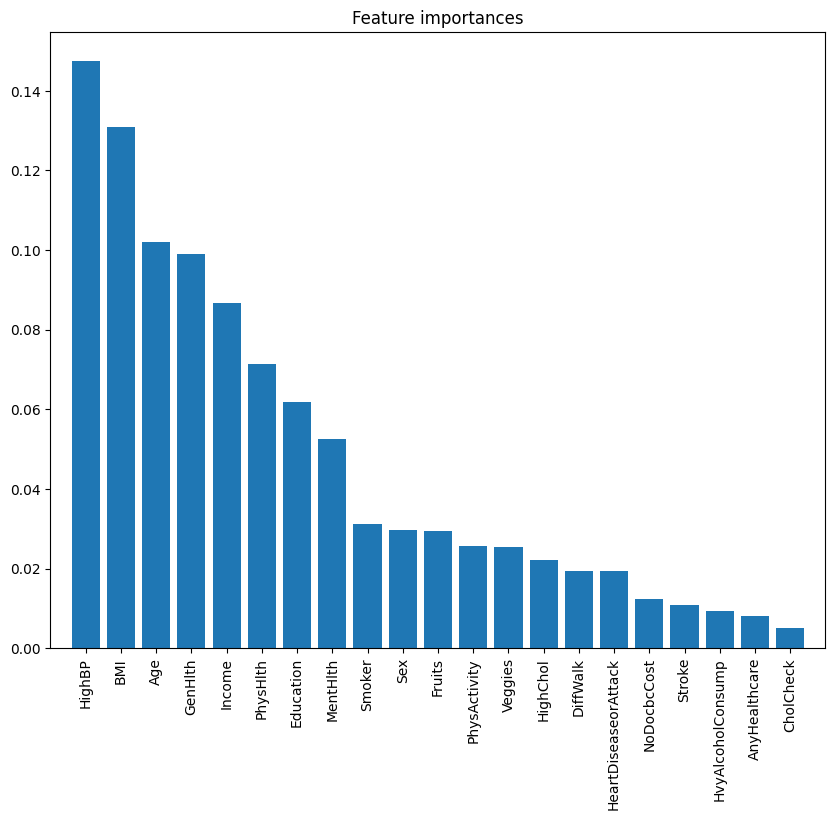

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Key Points to Analyze:

1. **Feature Ranking**:

* The output of importance ranks the features by how important they are in predicting diabetes. Features like **HighBP**, **HeartDiseaseorAttack**, **BMI**, and **GenHlth** are likely to be at the top of the list.

2. **Visualization of Feature Importances**:

* The bar chart shows the relative importance of all features. Larger bars indicate more significant contributions to the decision-making process.

3. **Insights**:

* The decision tree model is usually easier to interpret than logistic regression. It might reveal different patterns, such as the importance of **Age**, **Income**, or **Education** in predicting diabetes, which might not be as evident from the logistic regression model.